In [1]:
#load packages
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [39]:
#load dataset
df = pd.read_csv("exported.csv")

In [3]:
df

,"PRINCIPAL DIAGNOSIS,ASSOCIATED DIAGNOSIS,HISTORY OF PRESENT ILLNESS,PAST MEDICAL HISTORY,PHYSICAL EXAMINATION,LABORATORY DATA,Text,Annotation"
0,"Carcinoma of the colon .,""Urinary tract infect..."
1,977146916
2,HLGMC
3,2878891
4,022690
...,...
3671,02/28/2000 6:10 P
3672,cc :
3673,"TIANAZSHARA MASS , M.D. TAGLEN MASS , M.D."
3674,[ report_end ]


In [ ]:
!pip install spacy

In [ ]:
!pip install scispacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_ner_bc5cdr_md-0.5.1.tar.gz

In [ ]:
#load packages
import spacy
import scispacy


In [7]:
#create NLP object
nlp_obj = spacy.load("en_ner_bc5cdr_md")

In [8]:
#component of NLP object
nlp_obj.component_names

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer', 'parser', 'ner']

In [9]:
#explore entities
nlp_obj.get_pipe("ner").labels

('CHEMICAL', 'DISEASE')

In [32]:
df.head()

,"PRINCIPAL DIAGNOSIS,ASSOCIATED DIAGNOSIS,HISTORY OF PRESENT ILLNESS,PAST MEDICAL HISTORY,PHYSICAL EXAMINATION,LABORATORY DATA,Text,Annotation"
0,"Carcinoma of the colon .,""Urinary tract infect..."
1,977146916
2,HLGMC
3,2878891
4,022690


In [36]:
df

,"PRINCIPAL DIAGNOSIS,ASSOCIATED DIAGNOSIS,HISTORY OF PRESENT ILLNESS,PAST MEDICAL HISTORY,PHYSICAL EXAMINATION,LABORATORY DATA,Text,Annotation"
0,"Carcinoma of the colon .,""Urinary tract infect..."
1,977146916
2,HLGMC
3,2878891
4,022690
...,...
3671,02/28/2000 6:10 P
3672,cc :
3673,"TIANAZSHARA MASS , M.D. TAGLEN MASS , M.D."
3674,[ report_end ]


In [48]:
x=df['Text'][0]

In [49]:
x

"\n977146916\nHLGMC\n2878891\n022690\n01/27/1997 12:00:00 AM\nCARCINOMA OF THE COLON .\nUnsigned\nDIS\nReport Status :\nUnsigned\nPlease do not go above this box important format codes are contained .\nDISCHARGE SUMMARY\nARF32 FA\nDISCHARGE SUMMARY NAME :\nGIRRESNET , DIEDREO A\nUNIT NUMBER :\n075-71-01\nADMISSION DATE :\n01/27/1997\nDISCHARGE DATE :\n01/31/1997\nPRINCIPAL DIAGNOSIS :\nCarcinoma of the colon .\nASSOCIATED DIAGNOSIS :\nUrinary tract infection , and cirrhosis of the liver .\nHISTORY OF PRESENT ILLNESS :\nThe patient is an 80-year-old male , who had a history of colon cancer in the past , resected approximately ten years prior to admission , history of heavy alcohol use , who presented with a two week history of poor PO intake , weight loss , and was noted to have acute on chronic Hepatitis by chemistries and question of pyelonephritis .\nHe lived alone but was driven to the hospital by his son because of reported worsening and general care and deconditioning .\nEmergency

In [50]:
dataofx= nlp_obj(x)

In [51]:
#Extracting all the entities
for ent in dataofx.ents:
  print(ent.text, ent.label_)

NAME CHEMICAL
Carcinoma of the colon DISEASE
tract infection DISEASE
cirrhosis of the liver DISEASE
colon cancer DISEASE
alcohol CHEMICAL
weight loss DISEASE
Hepatitis DISEASE
pyelonephritis DISEASE
cachectic and jaundiced DISEASE
thiamine CHEMICAL
folate CHEMICAL
Cancer DISEASE
ginger CHEMICAL
cachectic , jaundiced man . DISEASE
throat DISEASE
ulcers DISEASE
creatinine CHEMICAL
magnesium CHEMICAL
elevated liver function DISEASE
bilirubin CHEMICAL
uric acid CHEMICAL
Hepatitis DISEASE
liver failure DISEASE
coagulopathy DISEASE
shortness of breath DISEASE
pulmonary edema DISEASE
oxygen CHEMICAL
morphine CHEMICAL
Dopamine CHEMICAL
TD DISEASE


In [52]:
###Visualize
from spacy import displacy

In [53]:
displacy.render(dataofx, style='ent', jupyter = True)

In [58]:
###Function to extract all the disease
def diseaseExtract(text):
  dataofx = nlp_obj(text)
  results = [ent.text for ent in dataofx.ents if ent.label_ == 'DISEASE']
  return results

In [87]:
df['Disease'] = df['Text'].apply(lambda x:diseaseExtract(x))

In [88]:
df.head()

,PRINCIPAL DIAGNOSIS,ASSOCIATED DIAGNOSIS,HISTORY OF PRESENT ILLNESS,PAST MEDICAL HISTORY,PHYSICAL EXAMINATION,LABORATORY DATA,Text,Annotation,Chemicals,Disease
0,Carcinoma of the colon .,"Urinary tract infection , and cirrhosis of the...","The patient is an 80-year-old male , who had a...","Cancer , ten years prior to admission , status...","In general was a cachectic , jaundiced man .","Notable for a BUN and creatinine 14 and 1.8 , ...",\n977146916\nHLGMC\n2878891\n022690\n01/27/199...,"[('Reason', 'pyelonephritis'), ('Drug', 'norma...","[NAME, alcohol, thiamine, folate, ginger, crea...","[Carcinoma of the colon, tract infection, cirr..."
1,Small cell lung cancer .,"Chronic obstructive pulmonary disease , left u...",The patient is a 72 year old woman with a hist...,"Severe chronic obstructive pulmonary disease ,...",The patient is an obese elderly female in no a...,Arterial blood gases 129/75/7.34 .White blood ...,\n812392414\nOMH\n4739887\n073138\n2/16/1998 1...,"[('Drug', 'Lasix'), ('Strength', '80 mg'), ('R...","[NAME, Lasix, Mevacor, O2 sat, Ca, DO A JOASSC...","[Chronic obstructive pulmonary disease, thromb..."
2,Non-Q wave myocardial infarction .,Status post anterior myocardial infarction in ...,The patient is a 65 year old Portuguese male w...,His past medical history included hypertension...,The physical examination on admission revealed...,The laboratory data revealed normal electrolyt...,\n559197012\nFIH\n4469096\n64024/p16e\n909222\...,"[('Drug', 'Metoprolol'), ('Strength', '50 mg')...","[Non-Q, Thallium, Metoprolol, Isordil, aspirin...","[WAVE, myocardial infarction, myocardial infar..."
3,Acute myocardial infarction .,Lower gastrointestinal bleed .,The patient is a 65 year old Portuguese male w...,Notable only for surgical repair of an ulcer a...,The patient was an elderly appearing male in n...,"The hematocrit was 44.9 , white blood count 14...",\n559197012\nFIH\n4469096\n52995/857a\n292657\...,"[('ADE', 'Lower gastrointestinal bleed'), ('Dr...","[nitroglycerin, antacids, morphine, nitroglyce...","[myocardial infarction, gastrointestinal bleed..."
4,Cryptogenic cirrhosis .,Variceal bleeding .,The patient is a 70-year-old female with crypt...,Cryptogenic cirrhosis with an unclear work up ...,"She is an obese , elderly woman in no acute di...","Notable for sodium 141 , potassium 4.2 , chlor...",\n988183518\nPUOMC\n7961198\n290757\n137082\n1...,"[('ADE', 'Upper GI bleed'), ('Reason', 'bright...","[NAME, Pitressin, Zoloft, Prilosec, Neomycin, ...","[cirrhosis, Variceal bleeding, cirrhosis, vari..."


In [89]:
###Function to extract all the chemicals
def chemicalExtract(text):
  dataofx = nlp_obj(text)
  results = [ent.text for ent in dataofx.ents if ent.label_ == 'CHEMICAL']
  return results

In [90]:
df['Chemicals'] = df['Text'].apply(lambda x:chemicalExtract(x))

In [91]:
df.head()

,PRINCIPAL DIAGNOSIS,ASSOCIATED DIAGNOSIS,HISTORY OF PRESENT ILLNESS,PAST MEDICAL HISTORY,PHYSICAL EXAMINATION,LABORATORY DATA,Text,Annotation,Chemicals,Disease
0,Carcinoma of the colon .,"Urinary tract infection , and cirrhosis of the...","The patient is an 80-year-old male , who had a...","Cancer , ten years prior to admission , status...","In general was a cachectic , jaundiced man .","Notable for a BUN and creatinine 14 and 1.8 , ...",\n977146916\nHLGMC\n2878891\n022690\n01/27/199...,"[('Reason', 'pyelonephritis'), ('Drug', 'norma...","[NAME, alcohol, thiamine, folate, ginger, crea...","[Carcinoma of the colon, tract infection, cirr..."
1,Small cell lung cancer .,"Chronic obstructive pulmonary disease , left u...",The patient is a 72 year old woman with a hist...,"Severe chronic obstructive pulmonary disease ,...",The patient is an obese elderly female in no a...,Arterial blood gases 129/75/7.34 .White blood ...,\n812392414\nOMH\n4739887\n073138\n2/16/1998 1...,"[('Drug', 'Lasix'), ('Strength', '80 mg'), ('R...","[NAME, Lasix, Mevacor, O2 sat, Ca, DO A JOASSC...","[Chronic obstructive pulmonary disease, thromb..."
2,Non-Q wave myocardial infarction .,Status post anterior myocardial infarction in ...,The patient is a 65 year old Portuguese male w...,His past medical history included hypertension...,The physical examination on admission revealed...,The laboratory data revealed normal electrolyt...,\n559197012\nFIH\n4469096\n64024/p16e\n909222\...,"[('Drug', 'Metoprolol'), ('Strength', '50 mg')...","[Non-Q, Thallium, Metoprolol, Isordil, aspirin...","[WAVE, myocardial infarction, myocardial infar..."
3,Acute myocardial infarction .,Lower gastrointestinal bleed .,The patient is a 65 year old Portuguese male w...,Notable only for surgical repair of an ulcer a...,The patient was an elderly appearing male in n...,"The hematocrit was 44.9 , white blood count 14...",\n559197012\nFIH\n4469096\n52995/857a\n292657\...,"[('ADE', 'Lower gastrointestinal bleed'), ('Dr...","[nitroglycerin, antacids, morphine, nitroglyce...","[myocardial infarction, gastrointestinal bleed..."
4,Cryptogenic cirrhosis .,Variceal bleeding .,The patient is a 70-year-old female with crypt...,Cryptogenic cirrhosis with an unclear work up ...,"She is an obese , elderly woman in no acute di...","Notable for sodium 141 , potassium 4.2 , chlor...",\n988183518\nPUOMC\n7961198\n290757\n137082\n1...,"[('ADE', 'Upper GI bleed'), ('Reason', 'bright...","[NAME, Pitressin, Zoloft, Prilosec, Neomycin, ...","[cirrhosis, Variceal bleeding, cirrhosis, vari..."


In [92]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [93]:
df['Disease'].to_list()

[['Carcinoma of the colon',
  'tract infection',
  'cirrhosis of the liver',
  'colon cancer',
  'weight loss',
  'Hepatitis',
  'pyelonephritis',
  'cachectic and jaundiced',
  'Cancer',
  'cachectic , jaundiced man .',
  'throat',
  'ulcers',
  'elevated liver function',
  'Hepatitis',
  'liver failure',
  'coagulopathy',
  'shortness of breath',
  'pulmonary edema',
  'TD'],
 ['Chronic obstructive pulmonary disease',
  'thrombosis',
  'chronic obstructive pulmonary disease',
  'shortness of breath',
  'shortness of breath',
  'chronic obstructive pulmonary disease',
  'hypercholesterolemia',
  'abdominal aortic aneurysm',
  'hypertension',
  'edema',
  'pleural effusion',
  'shortness of breath',
  'pneumonia',
  'swelling',
  'shortness of breath and weakness',
  'somnolent',
  'pulseless',
  'TD',
  'SHUFF'],
 ['WAVE',
  'myocardial infarction',
  'myocardial infarction',
  'hypertension',
  'diabetes mellitus',
  'myocardial infarction',
  'chest pain',
  'shortness of breath',
 

In [97]:
##Get most common disease for each category
def get_common_disease(x):
  disease_list = df['Disease'].tolist()
  disease_list = [i for j in disease_list for i in j]
  return disease_list

surgery_disease = get_common_disease('Surgery')

In [94]:
##Function to plot the disease and chemical
from wordcloud import WordCloud
def plot_disease_cloud(text):
  mywordcloud = WordCloud().generate(text)
  plt.imshow(mywordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

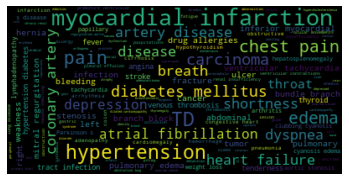

In [99]:
plot_disease_cloud(' '.join(surgery_disease))

In [106]:
df['Chemicals'].to_list()

[['NAME',
  'alcohol',
  'thiamine',
  'folate',
  'ginger',
  'creatinine',
  'magnesium',
  'bilirubin',
  'uric acid',
  'oxygen',
  'morphine',
  'Dopamine'],
 ['NAME', 'Lasix', 'Mevacor', 'O2 sat', 'Ca', 'DO A JOASSCCHIRD', 'Tau'],
 ['Non-Q',
  'Thallium',
  'Metoprolol',
  'Isordil',
  'aspirin',
  'Thallium',
  'Thallium',
  'Amesin',
  'oxygen',
  'aspirin',
  'nitroglycerins',
  'heparin',
  'Isordil',
  'aspirin',
  'alcohol',
  'creatinine',
  '140',
  'aspirin',
  'heparin',
  'nitroglycerin',
  'Metoprolol',
  'Thallium',
  'Thallium',
  'Thallium',
  'Amesin',
  'Amesin',
  'Amesin',
  'heparin',
  'CC'],
 ['nitroglycerin',
  'antacids',
  'morphine',
  'nitroglycerin',
  'morphine',
  'aspirin',
  'Ativan',
  'Penicillin',
  'alcohol',
  'sodium',
  'potassium',
  'CO2',
  'creatinine',
  'glucose',
  'alcohol',
  'Serax',
  'Lidocaine',
  'nitroglycerin',
  'heparin',
  'metoprolol',
  'thallium',
  'thallium',
  'nitrates',
  'aspirin',
  'aspirin',
  'Isordil',
  'Ser

In [109]:
##Get most common chemicals for each category
def get_common_chemicals(x):
  chemical_list = df['Chemicals'].tolist()
  chemical_list = [i for j in chemical_list for i in j]
  return chemical_list

chemicals = get_common_chemicals('Chemicals')

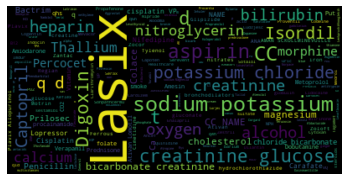

In [110]:
plot_disease_cloud(' '.join(chemicals))

In [112]:
pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_ner_bionlp13cg_md-0.5.1.tar.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 120.2 MB 52 kB/s 
  Created wheel for en-ner-bionlp13cg-md: filename=en_ner_bionlp13cg_md-0.5.1-py3-none-any.whl size=120241162 sha256=7604744464d542b3df6046d056b768b72d6e65ddf6a644df4c7e3108742c2b2f
  Stored in directory: /root/.cache/pip/wheels/b5/95/20/49fa0282c8ebe95c2dbfdf0b90b00dd3a9aa25f0b5f1d1bc03
Successfully built en-ner-bionlp13cg-md


In [113]:
#create new NLP object for another model that checks biological attributes
nlp_obj2 = spacy.load("en_ner_bionlp13cg_md")

In [114]:
nlp_obj2.component_names

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer', 'parser', 'ner']

In [115]:
nlp_obj2.get_pipe("ner").labels

('AMINO_ACID',
 'ANATOMICAL_SYSTEM',
 'CANCER',
 'CELL',
 'CELLULAR_COMPONENT',
 'DEVELOPING_ANATOMICAL_STRUCTURE',
 'GENE_OR_GENE_PRODUCT',
 'IMMATERIAL_ANATOMICAL_ENTITY',
 'MULTI_TISSUE_STRUCTURE',
 'ORGAN',
 'ORGANISM',
 'ORGANISM_SUBDIVISION',
 'ORGANISM_SUBSTANCE',
 'PATHOLOGICAL_FORMATION',
 'SIMPLE_CHEMICAL',
 'TISSUE')

In [116]:
dataofxobj2 = nlp_obj2(x)

In [117]:
#Extracting all the entities
for ent in dataofxobj2.ents:
  print(ent.text, ent.label_)

HLGMC CELL
01/27/1997 12:00:00 AM ORGANISM
FA SIMPLE_CHEMICAL
NAME SIMPLE_CHEMICAL
colon CANCER
liver ORGAN
patient ORGANISM
colon cancer CANCER
alcohol SIMPLE_CHEMICAL
PO SIMPLE_CHEMICAL
saline SIMPLE_CHEMICAL
thiamine SIMPLE_CHEMICAL
folate SIMPLE_CHEMICAL
abdominal ORGANISM_SUBDIVISION
stones PATHOLOGICAL_FORMATION
lungs ORGAN
Cancer CANCER
Folic acid SIMPLE_CHEMICAL
Drinks SIMPLE_CHEMICAL
head ORGANISM_SUBDIVISION
eyes ORGAN
ears ORGANISM_SUBDIVISION
nose ORGANISM_SUBDIVISION
gums ORGANISM_SUBDIVISION
lungs ORGAN
Cardiac MULTI_TISSUE_STRUCTURE
tender ORGAN
Liver edge TISSUE
abdominal wall MULTI_TISSUE_STRUCTURE
inguinal nodes MULTI_TISSUE_STRUCTURE
Rectal ORGAN
Skin ORGAN
BUN SIMPLE_CHEMICAL
creatinine SIMPLE_CHEMICAL
magnesium 1.2 SIMPLE_CHEMICAL
albumin GENE_OR_GENE_PRODUCT
liver ORGAN
bilirubin of 14 GENE_OR_GENE_PRODUCT
uric acid 11.4 GENE_OR_GENE_PRODUCT
alkaline phosphatase 173 SIMPLE_CHEMICAL
serum glutamic oxaloacetic transaminase 309 ORGANISM_SUBSTANCE
amylase GENE_OR_GENE

In [118]:
displacy.render(dataofxobj2, style='ent', jupyter = True)

In [119]:
###Function to extract all the organs 
def organExtract(text):
  dataofxobj2 = nlp_obj2(text)
  results = [ent.text for ent in dataofxobj2.ents if ent.label_ == 'ORGAN']
  return results

In [120]:
df['Organ'] = df['Text'].apply(lambda x:organExtract(x))

In [121]:
df.head()

,PRINCIPAL DIAGNOSIS,ASSOCIATED DIAGNOSIS,HISTORY OF PRESENT ILLNESS,PAST MEDICAL HISTORY,PHYSICAL EXAMINATION,LABORATORY DATA,Text,Annotation,Chemicals,Disease,Organ
0,Carcinoma of the colon .,"Urinary tract infection , and cirrhosis of the...","The patient is an 80-year-old male , who had a...","Cancer , ten years prior to admission , status...","In general was a cachectic , jaundiced man .","Notable for a BUN and creatinine 14 and 1.8 , ...",\n977146916\nHLGMC\n2878891\n022690\n01/27/199...,"[('Reason', 'pyelonephritis'), ('Drug', 'norma...","[NAME, alcohol, thiamine, folate, ginger, crea...","[Carcinoma of the colon, tract infection, cirr...","[liver, lungs, eyes, lungs, tender, Rectal, Sk..."
1,Small cell lung cancer .,"Chronic obstructive pulmonary disease , left u...",The patient is a 72 year old woman with a hist...,"Severe chronic obstructive pulmonary disease ,...",The patient is an obese elderly female in no a...,Arterial blood gases 129/75/7.34 .White blood ...,\n812392414\nOMH\n4739887\n073138\n2/16/1998 1...,"[('Drug', 'Lasix'), ('Strength', '80 mg'), ('R...","[NAME, Lasix, Mevacor, O2 sat, Ca, DO A JOASSC...","[Chronic obstructive pulmonary disease, thromb...","[pulmonary, lung biopsy, pulmonary, pulmonary,..."
2,Non-Q wave myocardial infarction .,Status post anterior myocardial infarction in ...,The patient is a 65 year old Portuguese male w...,His past medical history included hypertension...,The physical examination on admission revealed...,The laboratory data revealed normal electrolyt...,\n559197012\nFIH\n4469096\n64024/p16e\n909222\...,"[('Drug', 'Metoprolol'), ('Strength', '50 mg')...","[Non-Q, Thallium, Metoprolol, Isordil, aspirin...","[WAVE, myocardial infarction, myocardial infar...","[cardiac, rectum, cardiac, rectum, cardiac, he..."
3,Acute myocardial infarction .,Lower gastrointestinal bleed .,The patient is a 65 year old Portuguese male w...,Notable only for surgical repair of an ulcer a...,The patient was an elderly appearing male in n...,"The hematocrit was 44.9 , white blood count 14...",\n559197012\nFIH\n4469096\n52995/857a\n292657\...,"[('ADE', 'Lower gastrointestinal bleed'), ('Dr...","[nitroglycerin, antacids, morphine, nitroglyce...","[myocardial infarction, gastrointestinal bleed...","[heart, rectum, rectum, eyes, lung, stool, ext..."
4,Cryptogenic cirrhosis .,Variceal bleeding .,The patient is a 70-year-old female with crypt...,Cryptogenic cirrhosis with an unclear work up ...,"She is an obese , elderly woman in no acute di...","Notable for sodium 141 , potassium 4.2 , chlor...",\n988183518\nPUOMC\n7961198\n290757\n137082\n1...,"[('ADE', 'Upper GI bleed'), ('Reason', 'bright...","[NAME, Pitressin, Zoloft, Prilosec, Neomycin, ...","[cirrhosis, Variceal bleeding, cirrhosis, vari...","[esophagus, stomach, duodenum, heart, Lungs, b..."


In [134]:
df.head()

,PRINCIPAL DIAGNOSIS,ASSOCIATED DIAGNOSIS,HISTORY OF PRESENT ILLNESS,PAST MEDICAL HISTORY,PHYSICAL EXAMINATION,LABORATORY DATA,Text,Annotation,Chemicals,Disease,Organ
0,Carcinoma of the colon .,"Urinary tract infection , and cirrhosis of the...","The patient is an 80-year-old male , who had a...","Cancer , ten years prior to admission , status...","In general was a cachectic , jaundiced man .","Notable for a BUN and creatinine 14 and 1.8 , ...",\n977146916\nHLGMC\n2878891\n022690\n01/27/199...,"[('Reason', 'pyelonephritis'), ('Drug', 'norma...","[NAME, alcohol, thiamine, folate, ginger, crea...","[Carcinoma of the colon, tract infection, cirr...","[liver, lungs, eyes, lungs, tender, Rectal, Sk..."
1,Small cell lung cancer .,"Chronic obstructive pulmonary disease , left u...",The patient is a 72 year old woman with a hist...,"Severe chronic obstructive pulmonary disease ,...",The patient is an obese elderly female in no a...,Arterial blood gases 129/75/7.34 .White blood ...,\n812392414\nOMH\n4739887\n073138\n2/16/1998 1...,"[('Drug', 'Lasix'), ('Strength', '80 mg'), ('R...","[NAME, Lasix, Mevacor, O2 sat, Ca, DO A JOASSC...","[Chronic obstructive pulmonary disease, thromb...","[pulmonary, lung biopsy, pulmonary, pulmonary,..."
2,Non-Q wave myocardial infarction .,Status post anterior myocardial infarction in ...,The patient is a 65 year old Portuguese male w...,His past medical history included hypertension...,The physical examination on admission revealed...,The laboratory data revealed normal electrolyt...,\n559197012\nFIH\n4469096\n64024/p16e\n909222\...,"[('Drug', 'Metoprolol'), ('Strength', '50 mg')...","[Non-Q, Thallium, Metoprolol, Isordil, aspirin...","[WAVE, myocardial infarction, myocardial infar...","[cardiac, rectum, cardiac, rectum, cardiac, he..."
3,Acute myocardial infarction .,Lower gastrointestinal bleed .,The patient is a 65 year old Portuguese male w...,Notable only for surgical repair of an ulcer a...,The patient was an elderly appearing male in n...,"The hematocrit was 44.9 , white blood count 14...",\n559197012\nFIH\n4469096\n52995/857a\n292657\...,"[('ADE', 'Lower gastrointestinal bleed'), ('Dr...","[nitroglycerin, antacids, morphine, nitroglyce...","[myocardial infarction, gastrointestinal bleed...","[heart, rectum, rectum, eyes, lung, stool, ext..."
4,Cryptogenic cirrhosis .,Variceal bleeding .,The patient is a 70-year-old female with crypt...,Cryptogenic cirrhosis with an unclear work up ...,"She is an obese , elderly woman in no acute di...","Notable for sodium 141 , potassium 4.2 , chlor...",\n988183518\nPUOMC\n7961198\n290757\n137082\n1...,"[('ADE', 'Upper GI bleed'), ('Reason', 'bright...","[NAME, Pitressin, Zoloft, Prilosec, Neomycin, ...","[cirrhosis, Variceal bleeding, cirrhosis, vari...","[esophagus, stomach, duodenum, heart, Lungs, b..."


In [140]:
dataJson = df.head(1).to_json(orient='index')

In [ ]:
dataJson